In [1]:
import os
import pandas as pd
import cv2
import matplotlib.pyplot as plt
filedir = "../data/scores/"

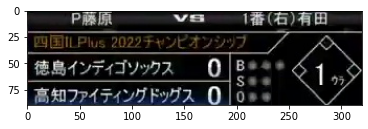

In [4]:
n = 660
for i in range(0, 260000, 60):
    filepath = f'{filedir}score{i}.jpg'
    if os.path.isfile(filepath):
        img = cv2.imread(filepath)
    if n < i:
        break
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

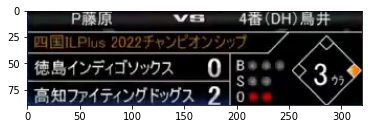

In [24]:
n = 70000
for i in range(0, 260000, 60):
    filepath = f'{filedir}score{i}.jpg'
    if os.path.isfile(filepath):
        img2 = cv2.imread(filepath)
    if n < i:
        break
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

18.612244897959183

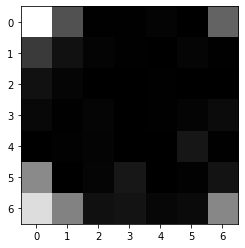

In [69]:
img_cut = cv2.cvtColor(img2[54:61, 256:263], cv2.COLOR_BGR2GRAY)
plt.imshow(img_cut, cmap='gray')
img_cut.mean()

71.05555555555556

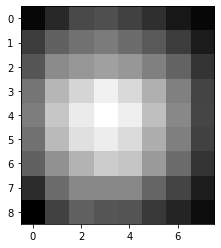

In [56]:
img_cut = cv2.cvtColor(img2[48:57, 212:220], cv2.COLOR_BGR2GRAY)
plt.imshow(img_cut, cmap='gray')
img_cut.mean()

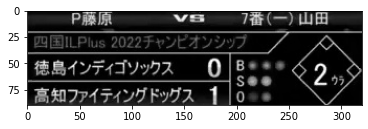

In [45]:
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY), cmap='gray')

In [71]:
# カウントのファイルへの書き出し
from telop_reading import reading_count
col = []
for i in range(0, 260000, 60):
    filepath = f'{filedir}score{i}.jpg'
    if os.path.isfile(filepath):
        img = cv2.imread(filepath)
        ball, strike, out = reading_count(img)
        col.append([i, ball, strike, out])
df = pd.DataFrame(col, columns=['frame', 'ball', 'strike', 'out'])

# df.to_csv('../data/count.csv', index=False)

In [2]:
# 塁状況のファイルへの書き出し
from telop_reading import reading_base
col = []
for i in range(0, 260000, 60):
    filepath = f'{filedir}score{i}.jpg'
    if os.path.isfile(filepath):
        img = cv2.imread(filepath)
        base = reading_base(img)
        col.append([i, base[0], base[1], base[2]])
df = pd.DataFrame(col, columns=['frame', '1st', '2nd', '3rd'])

df.to_csv('../data/base.csv', index=False)

In [3]:
# 点数ファイルの作成
col = []
for i in range(0, 260000, 60):
    filepath = f'{filedir}score{i}.jpg'
    if os.path.isfile(filepath):
        col.append([i, 0, 0])
df = pd.DataFrame(col, columns=['frame', 'score_1', 'score_2'])

df.to_csv('../data/score.csv', index=False)

In [4]:
# イニングファイルの作成
col = []
for i in range(0, 260000, 60):
    filepath = f'{filedir}score{i}.jpg'
    if os.path.isfile(filepath):
        col.append([i, 0])
df = pd.DataFrame(col, columns=['frame', 'inning'])

df.to_csv('../data/inning.csv', index=False)